# Investment Analysis Assignment

Spark Funds wants to make investments in a few companies. It wants to invest where most other investors are investing. 

The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively. 

Spark Funds has two minor constraints for investments:
It wants to invest between 5 to 15 million USD per round of investment
It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

# Checkpoint 1: Data Cleaning 1

In [468]:
import pandas as pd
rounds2 = pd.read_csv("/Users/prageeth/Documents/ML and AI/Assignment1/rounds2.csv", encoding = "ISO-8859-1") 
### MAC syntax followed for file path

In [469]:
rounds2_company= rounds2['company_permalink'].map(lambda x: x.title())
rounds2_company = rounds2_company.map(lambda x: x.lstrip('/Organization/-' ))
unique_company_round2=set(list(rounds2_company))
len(unique_company_round2)

66338

In [470]:
companies = pd.read_table("/Users/prageeth/Documents/ML and AI/Assignment1/companies.txt", encoding = "ISO-8859-1")
### MAC syntax followed for file path

In [471]:
companies_company= companies['permalink'].map(lambda x: x.title())
companies_company = companies_company.map(lambda x: x.lstrip('/Organization/-' ))
unique_name_companies= set(list(companies_company))
len(unique_name_companies)

66336

In [472]:
print(len(unique_company_round2-unique_name_companies))

7


In [473]:
companies['permalink']= companies['permalink'].map(lambda x:x.title())
rounds2['company_permalink']= rounds2['company_permalink'].map(lambda x:x.title())

master_frame=pd.merge(rounds2, companies, how='inner',left_on='company_permalink', right_on='permalink')
master_frame.drop('permalink',axis=1,inplace=True) ## remove duplicate column of permalink 
master_frame.to_csv("/Users/prageeth/Documents/ML and AI/Assignment1/master_frame.csv", encoding = "ISO-8859-1")
Masterinitial=len(master_frame)
print(Masterinitial)

114942


In [474]:
## Identify missing data and renove the same wherever applicable
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [475]:
import numpy as np
master_frame=master_frame.drop('funding_round_code',axis=1) ## Remove column 'funding_round_code' as it is not required for further analysis
master_frame=master_frame.drop('founded_at',axis=1) ## Remove column 'funding_round_code' as it is not required for further analysis
master_frame=master_frame.drop('homepage_url',axis=1) ## Remove column
master_frame=master_frame.drop('state_code',axis=1) ## Remove column
master_frame=master_frame.drop('region',axis=1) ## Remove column
master_frame=master_frame.drop('city',axis=1) ## Remove column
master_frame=master_frame[-np.isnan(master_frame['raised_amount_usd'])] ## Remove rows missing data in for 'raised_amount_usd' as this is mandatory for further calculation
master_frame=master_frame[-(master_frame['country_code']).isnull()] ## Remove rows missing data in for 'country_code' as this is mandatory for further calculation
master_frame=master_frame[-(master_frame['category_list']).isnull()] ## Remove rows missing data in for 'country_code' as this is mandatory for further calculation
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)),2))
master_frame_all=master_frame


company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64


In [476]:
Masterfinal= len(master_frame)
print("Initial nuber of rows in master_frame dataframe: "+ str(Masterinitial))
print("Final nuber of rows in master_frame dataframe: "+ str(Masterfinal))
print("Percenatge data retaited after data cleansing: "+ str(Masterfinal/Masterinitial *100))

Initial nuber of rows in master_frame dataframe: 114942
Final nuber of rows in master_frame dataframe: 88529
Percenatge data retaited after data cleansing: 77.02058429468775


# Checkpoint 2: Funding Type Analysis

In [477]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False).astype(np.int)

funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4512698
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int64

In [478]:
###Calculate the most representative value of the investment amount for each of the four funding types 
###(venture, angel, seed, and private equity) 

list_cat=['venture', 'angel', 'seed','private_equity']
master_frame=master_frame.loc[master_frame['funding_round_type'].isin(list_cat), :]
funding_round_mean=master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending =True).astype(np.int)
funding_round_mean

funding_round_type
seed                747793
angel               971573
venture           11724222
private_equity    73938486
Name: raised_amount_usd, dtype: int64

In [479]:
###Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type
## venture is 1.172422e+07 between 5x10^6 and 1.5x10^7 inverstment window
list_cat=['venture']   
master_frame=master_frame.loc[master_frame['funding_round_type'].isin(list_cat), :]

# Checkpoint 3: Country Analysis

In [480]:
###Spark Funds wants to see the top nine countries which have received the highest total funding 
### (across ALL sectors for the chosen investment type)
funding_round=master_frame.groupby('country_code') 
top9_countries=pd.DataFrame(funding_round['raised_amount_usd'].sum().sort_values(ascending =False).astype(np.int).head(9))
top9_countries['name']=top9_countries.index
top9_countries.reset_index()

,country_code,raised_amount_usd,name
0,USA,420068029342,USA
1,CHN,39338918773,CHN
2,GBR,20072813004,GBR
3,IND,14261508718,IND
4,CAN,9482217668,CAN
5,FRA,7226851352,FRA
6,ISR,6854350477,ISR
7,DEU,6306921981,DEU
8,JPN,3167647127,JPN


In [481]:
###For the chosen investment type, make a data frame named top9 with the top nine countries 
### (based on the total investment amount each country has received)
top9_list= top9_countries.name  #### Top nine countries based on investment
top9=master_frame.loc[master_frame['country_code'].isin(top9_list), :]
master_data_top9=top9

In [482]:
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype(np.int)


country_code
USA    420068029342
GBR     20072813004
IND     14261508718
Name: raised_amount_usd, dtype: int64

# Checkpoint 4: Sector Analysis 1

In [483]:
#### Extract the primary sector of each category list from the category_list column
top3_english['category_list']= top3_english['category_list'].astype(str) 
top3_english['primary_sector']= top3_english['category_list'].str.split("|", 1)
top3_english['primary_sector']=top3_english['primary_sector'].str.get(0) 
top3_english['primary_sector']=top3_english['primary_sector'].str.lower()

/Users/prageeth/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/prageeth/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/prageeth/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [484]:
mapping = pd.read_csv("/Users/prageeth/Documents/ML and AI/Assignment1/mapping.csv", encoding = "ISO-8859-1")
### MAC syntax followed for file path
mapping.rename(columns= {"category_list":"primary_sector"}, inplace=True)
mapping['primary_sector']=mapping['primary_sector'].str.lower()
mapping['primary_sector']=mapping.primary_sector.astype(str).map(lambda x: x.replace('0','na'))

In [485]:
mapping = pd.melt(mapping,id_vars=["primary_sector"])
mapping = mapping[mapping.value != 0]

In [486]:
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
top3_english=top3_english.drop('value',axis=1)
top3_english=top3_english.drop('_merge',axis=1)
top3_english.rename(columns= {"variable":"main_sector"}, inplace=True)

# Checkpoint 5: Sector Analysis 2

In [487]:
### Create three separate data frames D1, D2 and D3 for each of the three countries containing 
### the observations of funding type FT falling within the 5-15 million USD range. 

# lets select all rows whoes investment between 5 and 15 million
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd < 5000000)].index)
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd > 15000000)].index)
master_data_top3=top3_english

D1 = top3_english[top3_english['country_code'] == 'USA']
D2 = top3_english[top3_english['country_code'] == 'GBR']
D3 = top3_english[top3_english['country_code'] == 'IND']

In [488]:
############# USA related details ######################


In [489]:
D1['raised_amount_usd'].count()

12064

In [490]:
D1['raised_amount_usd'].sum()

107766584223.0

In [491]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [492]:
D1[D1.main_sector=="Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(6)

company_permalink
/Organization/Virtustream            64300000.0
/Organization/Capella                54968051.0
/Organization/Airtight-Networks      54201907.0
/Organization/Decarta                52100000.0
/Organization/Black-Duck-Software    51000000.0
/Organization/Approva                50100000.0
Name: raised_amount_usd, dtype: float64

In [493]:
D1[D1.main_sector=="Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(6)

company_permalink
/Organization/Shotspotter    67933006.0
/Organization/Demandbase     63000000.0
/Organization/Intacct        61800000.0
/Organization/Netbase        60600000.0
/Organization/Lotame         59700000.0
/Organization/Firstrain      58344731.0
Name: raised_amount_usd, dtype: float64

In [494]:
############# GBR related details ######################

In [495]:
D2['raised_amount_usd'].count()

621

In [496]:
D2['raised_amount_usd'].sum()

5379078691.0

In [497]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [498]:
D2[D2.main_sector=="Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(6)

company_permalink
/Organization/Electric-Cloud             37000000.0
/Organization/Sensage                    36250000.0
/Organization/Enigmatic                  32500000.0
/Organization/Silverrail-Technologies    29000000.0
/Organization/Opencloud                  27972766.0
/Organization/Myoptique-Group            27694613.0
Name: raised_amount_usd, dtype: float64

In [499]:
D2[D2.main_sector=="Social, Finance, Analytics, Advertising"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(6)

company_permalink
/Organization/Celltick-Technologies    37500000.0
/Organization/Mythings                 34000000.0
/Organization/Zopa                     32900000.0
/Organization/Imagini                  28550000.0
/Organization/Marketinvoice            25553007.0
/Organization/Sumup                    24293649.0
Name: raised_amount_usd, dtype: float64

In [500]:
############# IND related details ######################

In [501]:
D3['raised_amount_usd'].count()

328

In [502]:
D3['raised_amount_usd'].sum()

2949543602.0

In [503]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [504]:
D3[D3.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(6)

company_permalink
/Organization/Firstcry-Com                         39000000.0
/Organization/Myntra                               38000000.0
/Organization/Commonfloor                          32900000.0
/Organization/Pepperfry-Com                        28000000.0
/Organization/Itzcash-Card-Ltd                     25000000.0
/Organization/Nxtgen-Data-Center-Cloud-Services    22300000.0
Name: raised_amount_usd, dtype: float64

In [505]:
D3[D3.main_sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(6)

company_permalink
/Organization/Manthan-Systems               50700000.0
/Organization/Komli-Media                   28000000.0
/Organization/Shopclues-Com                 25000000.0
/Organization/Intarvo                       21900000.0
/Organization/Grameen-Financial-Services    21556050.0
/Organization/Bankbazaar                    19000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

In [506]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

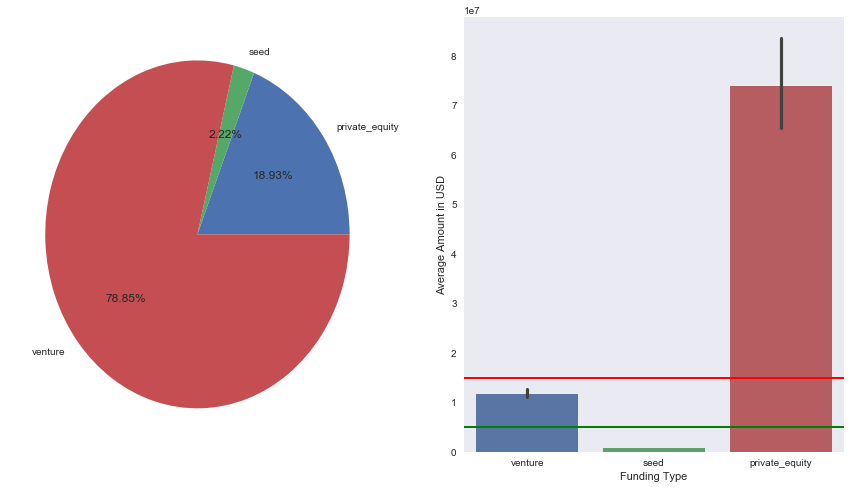

In [507]:
## A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
## and the average amount of investment in each funding type. This chart should make it clear that 
## a certain funding type (FT) is best suited for Spark Funds.
cat_list=['venture', 'seed','private_equity']
chart_one_data=master_frame_all.loc[master_frame_all['funding_round_type'].isin(cat_list), :]
data_pie=chart_one_data.pivot_table(values = 'raised_amount_usd',index = ['funding_round_type'], aggfunc = {'sum'})
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.pie(data_pie, labels=data_pie.index,autopct='%0.2f%%',radius =1)

plt.subplot(122)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=chart_one_data).set(xlabel='Funding Type', ylabel='Average Amount in USD')
plt.axhline(y=5000000, linewidth=2, color = 'g')
plt.axhline(y=15000000, linewidth=2, color = 'r')

plt.show()

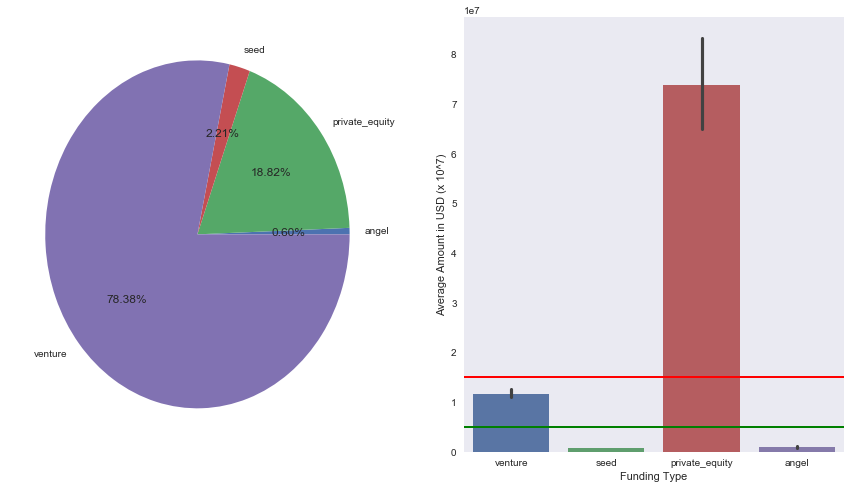

In [508]:
###Q1  As per my understaning Checkpoint 2 talks about all 4 including angel, hence using the below graph
cat_list=['venture', 'seed','private_equity', 'angel']
chart_one_data=master_frame_all.loc[master_frame_all['funding_round_type'].isin(cat_list), :]
data_pie=chart_one_data.pivot_table(values = 'raised_amount_usd',index = ['funding_round_type'], aggfunc = {'sum'})
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.pie(data_pie, labels=data_pie.index,autopct='%0.2f%%',radius =1)

plt.subplot(122)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=chart_one_data).set(xlabel='Funding Type', ylabel='Average Amount in USD (x 10^7)')
plt.axhline(y=5000000, linewidth=2, color = 'g')
plt.axhline(y=15000000, linewidth=2, color = 'r')

plt.show()

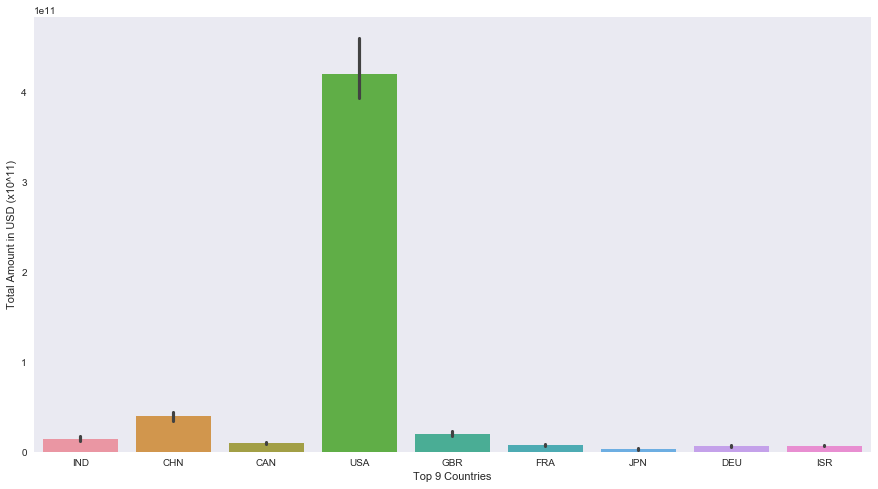

In [509]:
##  Q2 A plot showing the top 9 countries against the total amount of investments of funding type FT. 
## This should make the top 3 countries (Country 1, Country 2, and Country 3)very clear.
plt.figure(figsize=(15, 8))
sns.barplot(x='country_code', y='raised_amount_usd', data=master_data_top9, estimator=sum).set(xlabel='Top 9 Countries', ylabel='Total Amount in USD (x10^11)')
plt.show()

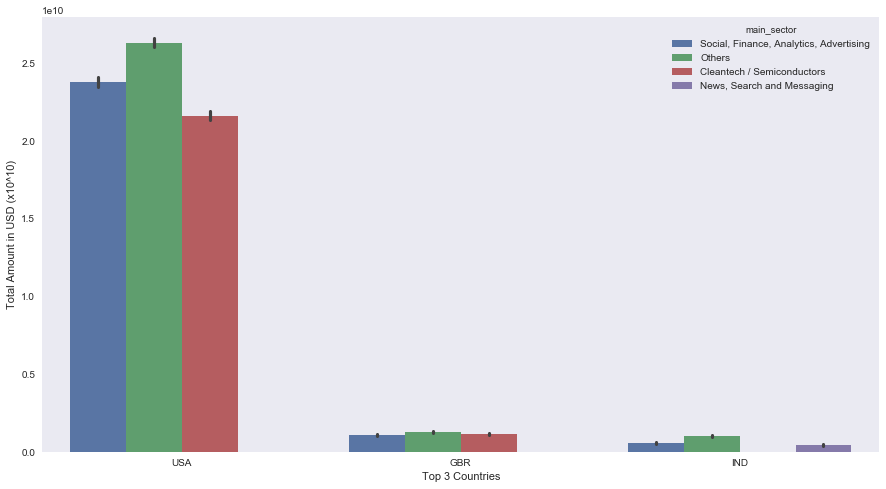

In [510]:
##  Q3 A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 
d1_list=['Others', 'Social, Finance, Analytics, Advertising','Cleantech / Semiconductors']
top3_sector_d1=D1.loc[D1['main_sector'].isin(d1_list), :]

d2_list=['Others', 'Social, Finance, Analytics, Advertising','Cleantech / Semiconductors']
top3_sector_d2=D2.loc[D2['main_sector'].isin(d2_list), :]

d3_list=['Others', 'Social, Finance, Analytics, Advertising','News, Search and Messaging']
top3_sector_d3=D3.loc[D3['main_sector'].isin(d3_list), :]

new_frame=pd.concat([top3_sector_d1,top3_sector_d2,top3_sector_d3])
plt.figure(figsize=(15, 8))
sns.barplot(y= 'raised_amount_usd', x= 'country_code', hue='main_sector', data=new_frame, estimator=np.sum).set(xlabel='Top 3 Countries', ylabel='Total Amount in USD (x10^10)')
plt.show()